In [1]:
# run this line to install quansyn
# !pip install quansyn
# please install nltk and conllu before you use quansyn
# !pip install nltk conllu

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


DEPRECATION: lingpy 2.6.9 has a non-standard dependency specifier csvw>=1.5.6". pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of lingpy or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


# 1. compute syntactic indicators

In [8]:
# import package
from quansyn.depval import DepValAnalyzer

# import your treebank
data = open(r"D:\database\ud-treebanks-v2.12\UD_English-PUD\en_pud-ud-test.conllu",encoding='utf-8')
# initialize analyzer
dv = DepValAnalyzer(data)

##  Dependency Distance

[(1, 7235), (2, 4578), (3, 2389), (4, 1218), (5, 654), (6, 427), (7, 297), (8, 201), (9, 161), (10, 122), (11, 102), (12, 80), (13, 47), (14, 40), (15, 33), (16, 20), (17, 22), (18, 26), (19, 14), (20, 9), (21, 10), (22, 9), (23, 10), (24, 4), (25, 4), (26, 2), (28, 4), (29, 4), (30, 1), (32, 1), (35, 1)]


Text(0, 0.5, 'Count')

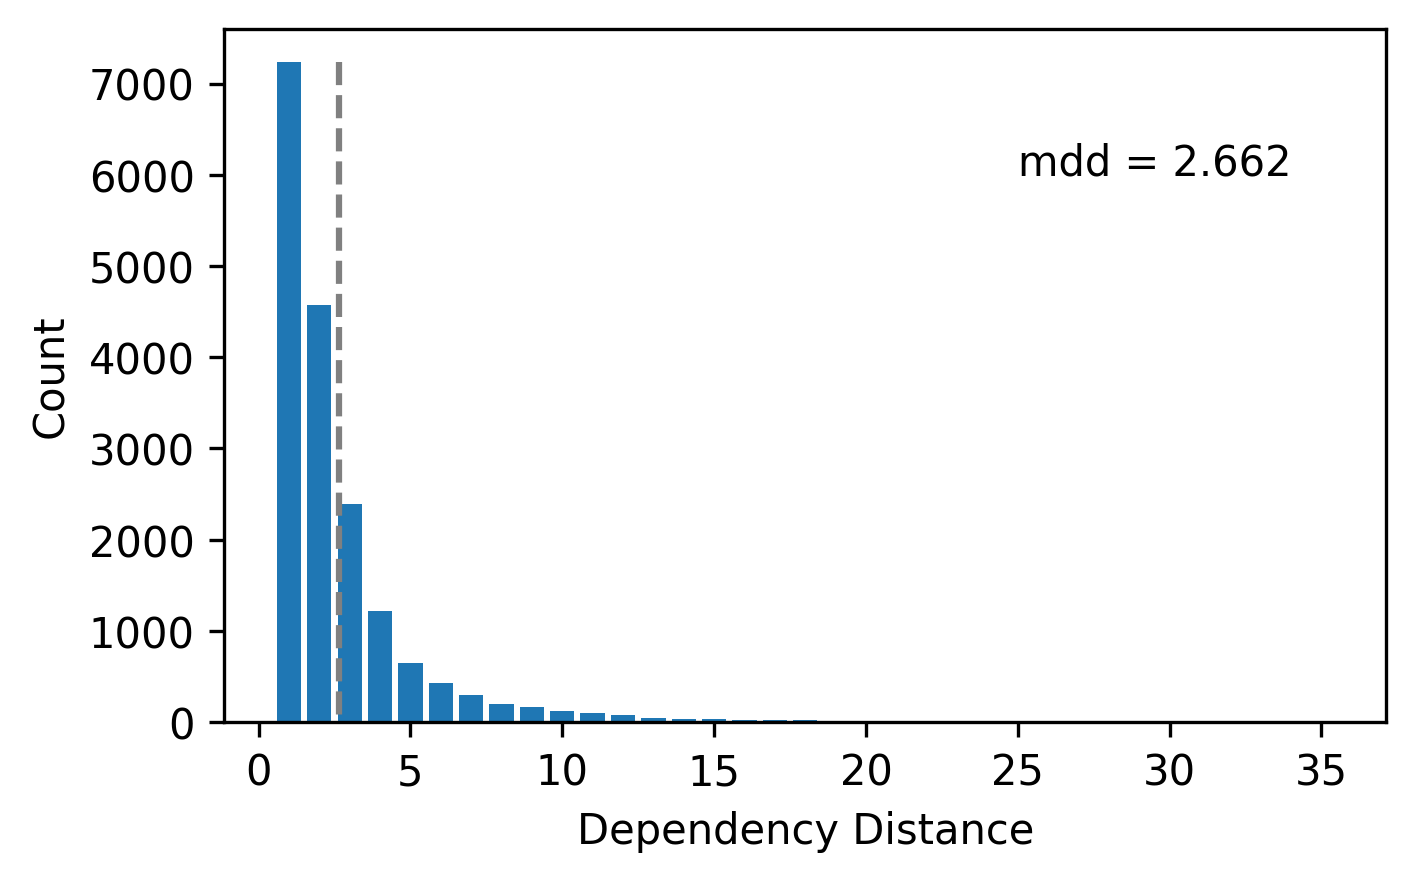

In [10]:
# dependency distance distribution  
data = dv.dd_distribution()  
print(data)
# mean dependency distance  
mdd = dv.mdd()


# plot
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3),dpi=300)
plt.bar([i[0] for i in data],[i[1] for i in data],)
plt.plot([mdd for i in data],[i[1] for i in data],ls='--',color='gray')
plt.text(25,6000,f'mdd = {mdd:.3f}')
plt.xlabel('Dependency Distance')
plt.ylabel('Count')

##  Hierarchy Distance 

Text(0, 0.5, 'Count')

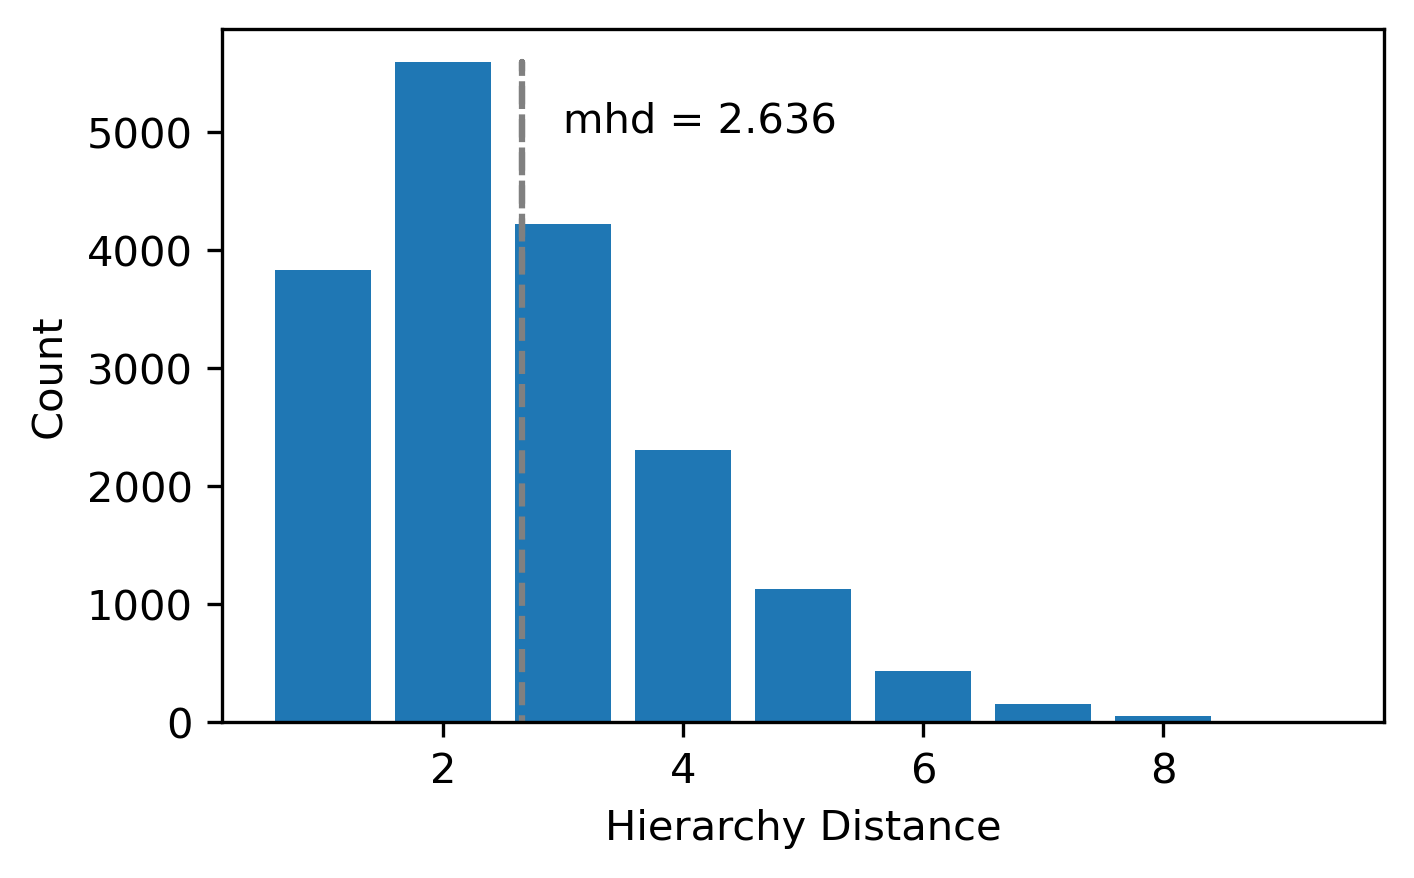

In [3]:
# hierarchy distance distribution  
data = dv.hd_distribution()  
# mean hierarchy distance  
mhd = dv.mhd()

# plot
plt.figure(figsize=(5, 3),dpi=300)
plt.bar([i[0] for i in data],[i[1] for i in data],)
plt.plot([mdd for i in data],[i[1] for i in data],ls='--',color='gray')
plt.text(3,5000,f'mhd = {mhd:.3f}')
plt.xlabel('Hierarchy Distance')
plt.ylabel('Count')

##  tree width and tree height

{'height': [(1, 6), (2, 78), (3, 223), (4, 275), (5, 238), (6, 108), (7, 48), (8, 19), (9, 5)], 'width': [(1, 1), (2, 12), (3, 59), (4, 127), (5, 180), (6, 169), (7, 152), (8, 130), (9, 72), (10, 41), (11, 26), (12, 12), (13, 10), (14, 6), (15, 2), (17, 1)]}


Text(0, 0.5, 'Count')

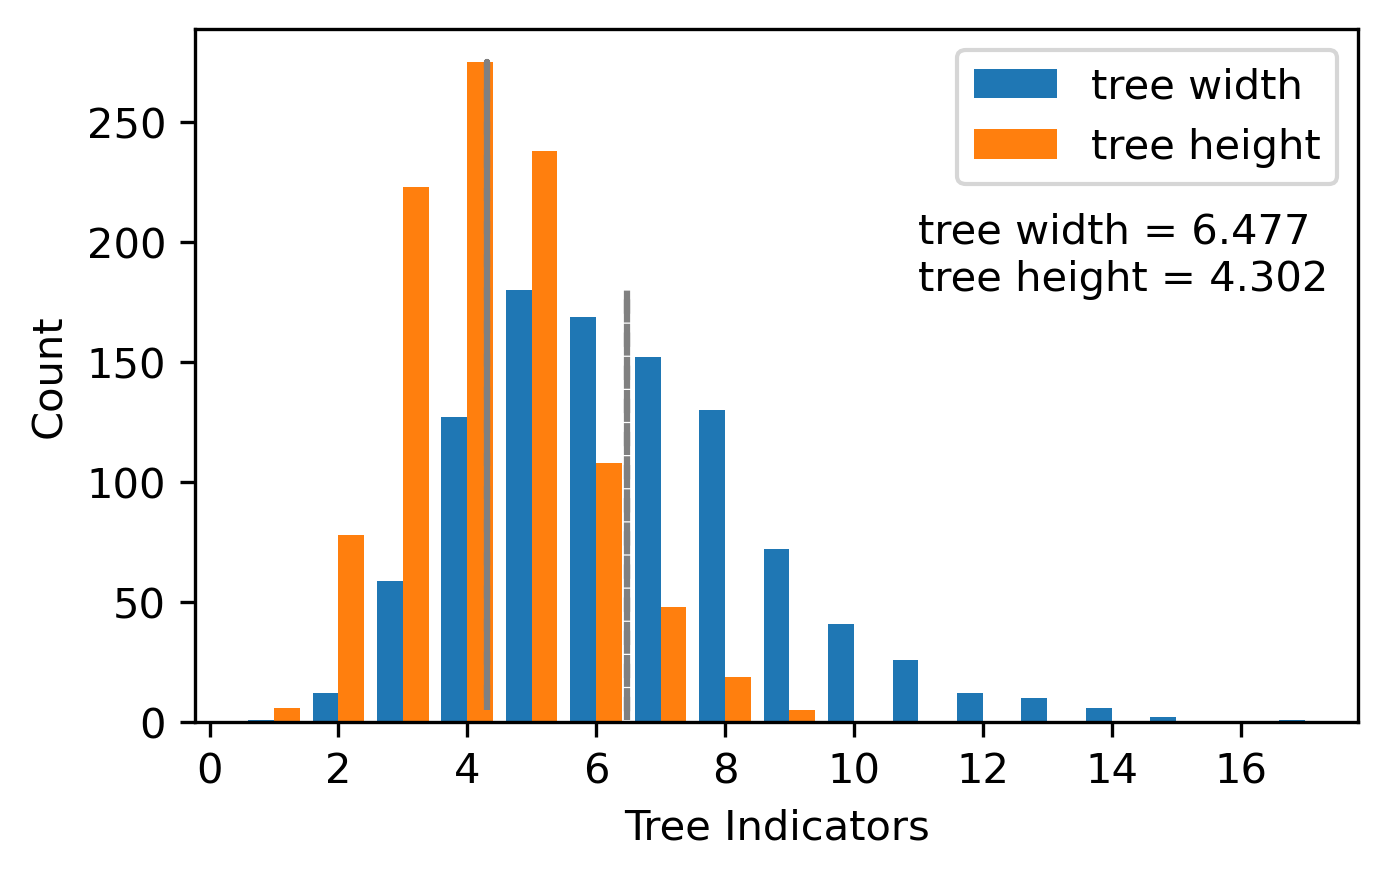

In [8]:
# tree indicators distribution  
data = dv.tree_distribution()  
print(data)
# mean tree width and mean tree height  
tree_indicators = dv.tree()

# plot
plt.figure(figsize=(5, 3),dpi=300)
bar_width = 0.4
plt.bar([i[0]-bar_width*0.5 for i in data['width']],[i[1] for i in data['width']],bar_width,label='tree width')
plt.bar([i[0]+bar_width*0.5 for i in data['height']],[i[1] for i in data['height']],bar_width,label='tree height')
from matplotlib.ticker import MaxNLocator
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
width = tree_indicators['width']
height = tree_indicators['height']
plt.plot([width for i in data['width']],[i[1] for i in data['width']],ls='--',color='gray')
plt.plot([height for i in data['height']],[i[1] for i in data['height']],ls='--',color='gray')
plt.text(11,200,f'tree width = {width:.3f}')
plt.text(11,180,f'tree height = {height:.3f}')
plt.legend()
plt.xlabel('Tree Indicators')
plt.ylabel('Count')

##  Dependency direction

In [6]:
dv.pdd()

{'head final': 0.676, 'head initial': 0.324}

## valency

Text(0, 0.5, 'Count')

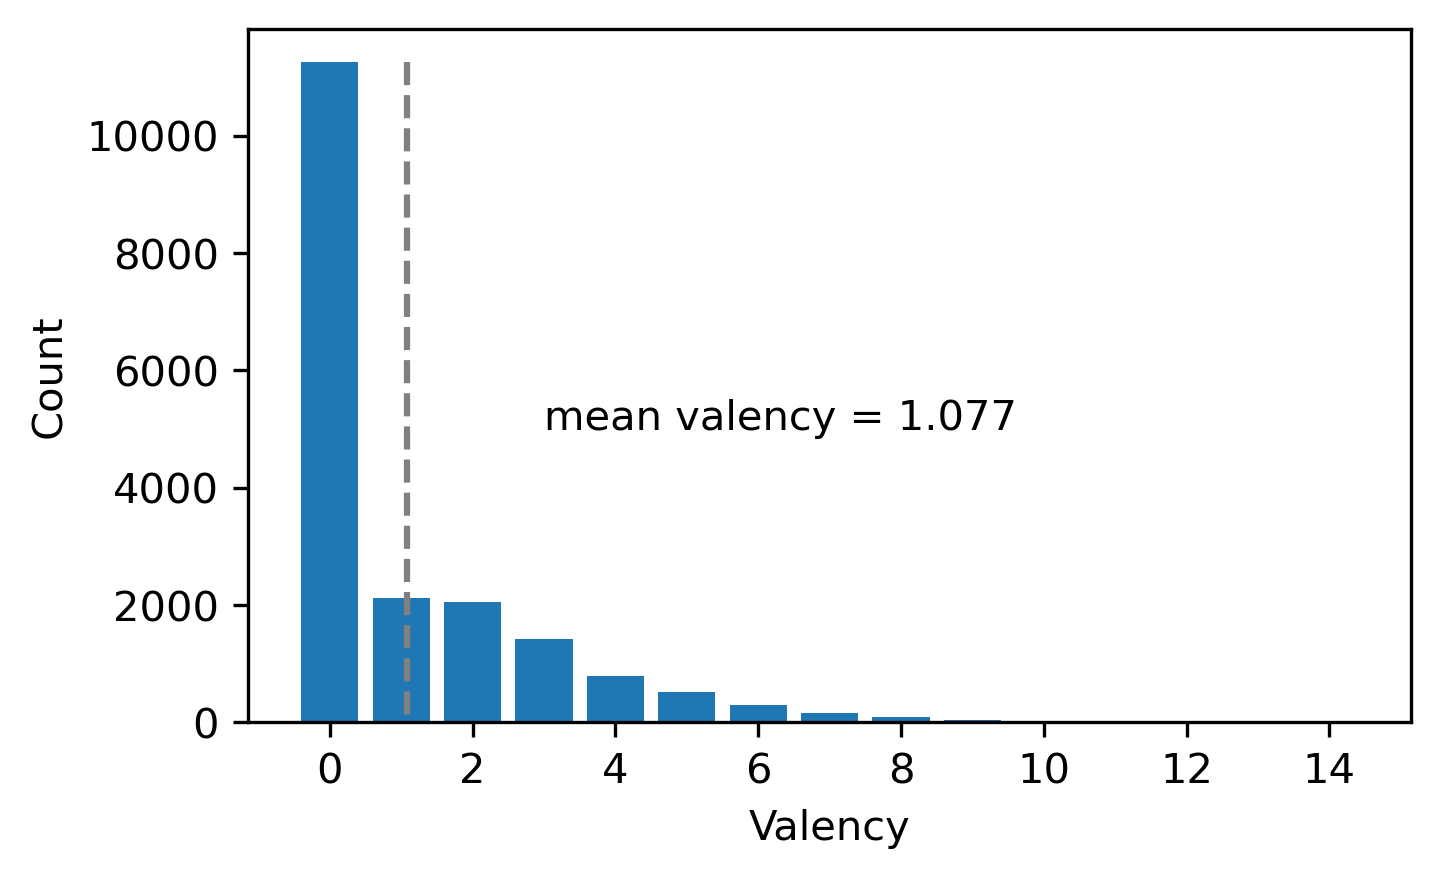

In [10]:
# valency distribution  
data = dv.valency_distribution()  
# mean valency  
mean_valency = dv.mean_valency()

# plot
plt.figure(figsize=(5, 3),dpi=300)
plt.bar([i[0] for i in data],[i[1] for i in data],)
plt.plot([mean_valency for i in data],[i[1] for i in data],ls='--',color='gray')
plt.text(3,5000,f'mean valency = {mean_valency:.3f}')
plt.xlabel('Valency')
plt.ylabel('Count')

##  probabilistic valency pattern and model fit 

{'params': array([0.8814629 , 0.25403553]), 'r^2': 0.774571957570547}


Text(15, 0.2, '$y = 0.25x^{-0.88},R^2 = 0.775$')

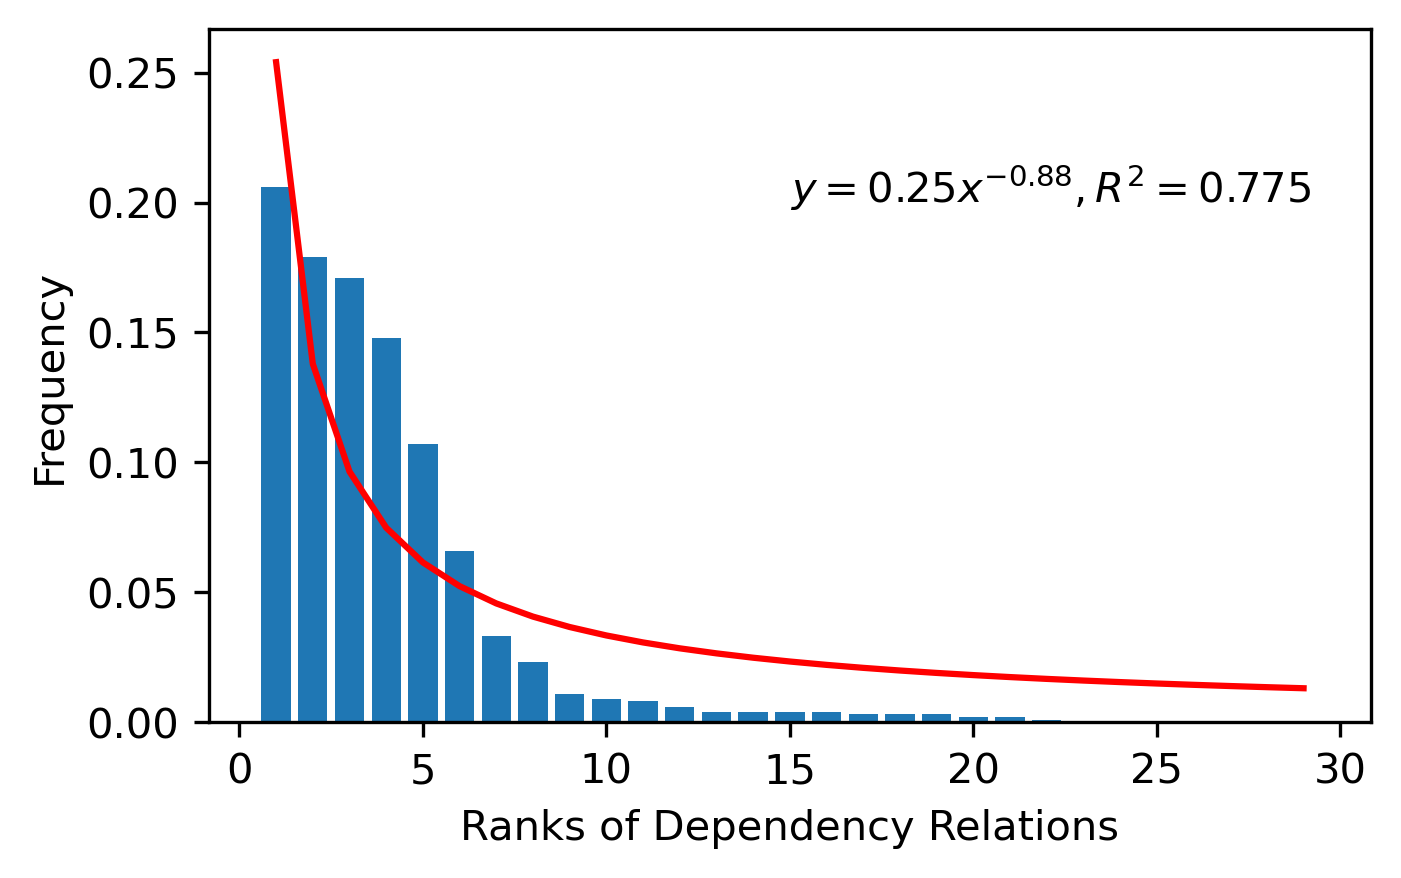

In [22]:
pvp = dv.pvp(pos='NOUN');pvp

dependencies =  [i[0] for i in pvp['act as a dep']]
data = [i[1] for i in pvp['act as a dep']]
plt.figure(figsize=(5, 3),dpi=300)
plt.bar(range(1,len(data)+1),data)
plt.xlabel('Ranks of Dependency Relations')
plt.ylabel('Frequency')

from quantling.lawfitter import fit
result = fit([range(1,len(data)+1),data],'zipf')
print(result)
plt.plot(range(1,len(data)+1),[result['params'][1]*i**(-result['params'][0]) for i in range(1,len(data)+1)],color='r')
plt.text(15,0.2,'$y = 0.25x^{-0.88},R^2 = 0.775$')

##  calculate indicators by sents

function *calculate_by_sents* can compute indicators(mhdd,vk,sent length,mdd,mhd,tdl and so on) by sents.

In [5]:
sent_data = dv.calculate_by_sents();sent_data

[{'mdd': 3.034,
  'tdl': 88,
  'mhd': 2.483,
  'mhdd': 7.25,
  'dd': [7,
   6,
   3,
   2,
   1,
   4,
   1,
   11,
   3,
   2,
   1,
   4,
   2,
   1,
   3,
   1,
   2,
   1,
   2,
   1,
   3,
   1,
   2,
   9,
   3,
   2,
   1,
   4,
   5],
  'hd': [2,
   2,
   4,
   4,
   4,
   3,
   2,
   1,
   3,
   3,
   3,
   2,
   2,
   2,
   1,
   3,
   2,
   1,
   3,
   3,
   2,
   3,
   3,
   1,
   3,
   3,
   3,
   2,
   2],
  'sent_length': 30,
  'tree_height': 4,
  'tree_width': 12,
  'vk': 1.529},
 {'mdd': 2.933,
  'tdl': 44,
  'mhd': 2.667,
  'mhdd': 3.0,
  'dd': [1, 15, 1, 2, 1, 1, 3, 2, 1, 3, 5, 4, 3, 1, 1],
  'hd': [2, 1, 3, 2, 5, 4, 3, 5, 5, 4, 1, 1, 1, 2, 1],
  'sent_length': 16,
  'tree_height': 5,
  'tree_width': 5,
  'vk': -0.203},
 {'mdd': 3.267,
  'tdl': 98,
  'mhd': 2.6,
  'mhdd': 7.5,
  'dd': [15,
   2,
   1,
   12,
   3,
   2,
   1,
   4,
   1,
   2,
   1,
   2,
   1,
   1,
   5,
   1,
   3,
   2,
   1,
   6,
   1,
   3,
   2,
   1,
   4,
   8,
   4,
   3,
   1,
   5],
  'h

Text(0.5, 0, 'Sentence Length')

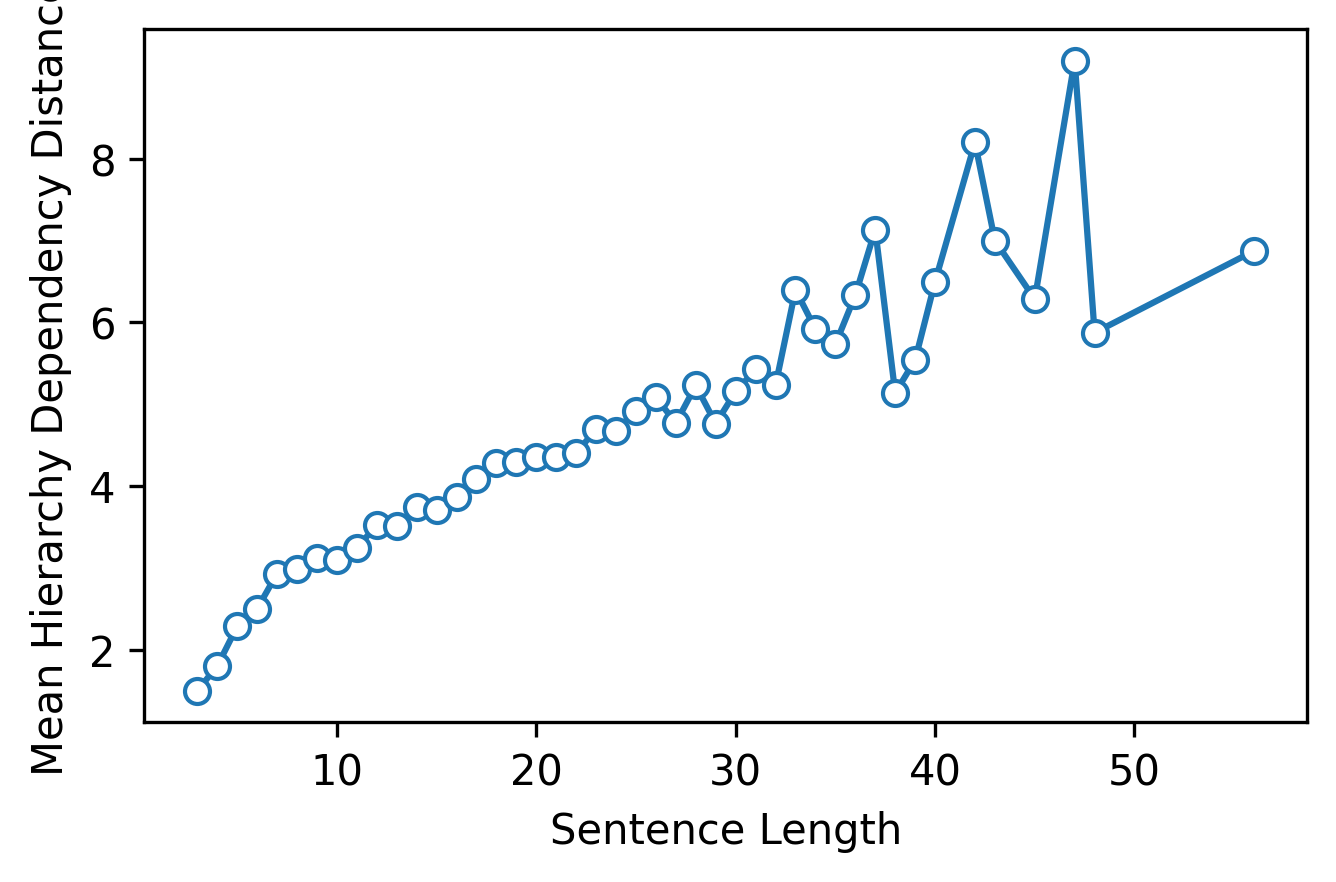

In [4]:
sent_data = dv.calculate_by_sents()

tdl = {}
mhdd = {}
for s in sent_data:
    if s['sent_length'] not in tdl:
        tdl[s['sent_length']] = []
    tdl[s['sent_length']].append(s['tdl'])
    
    if s['sent_length'] not in mhdd:
        mhdd[s['sent_length']] = []
    mhdd[s['sent_length']].append(s['mhdd'])
    
plt.figure(figsize=(5, 3),dpi=300)

# tdl = sorted(tdl.items())
# data = [(i[0],sum(i[1])/len(i[1])) for i in tdl]
# plt.plot([i[0] for i in data],[i[1] for i in data],marker='o',markerfacecolor='white')
# plt.ylabel('Total Dependency Length')
# plt.xlabel('Sentence Length')

mhdd = sorted(mhdd.items())
data = [(i[0],sum(i[1])/len(i[1])) for i in mhdd]
plt.plot([i[0] for i in data],[i[1] for i in data],marker='o',markerfacecolor='white')
plt.ylabel('Mean Hierarchy Dependency Distance')
plt.xlabel('Sentence Length')

# construct linguistic networks and calculate network indicators

In [7]:
from quansyn.lingnet import conllu2edge,fitPowerLaw
data = open(r"D:\database\ud-treebanks-v2.12\UD_English-PUD\en_pud-ud-test.conllu",encoding='utf-8')
edges = conllu2edge(data)

import networkx as nx
G = nx.Graph()
G.add_edges_from(edges)
# N = max(nx.connected_components(G))
# G = G.subgraph(N)
print("N:",len(G.nodes))
print("E:",len(G.edges))
print("<k>:",sum(dict(G.degree()).values()) / len(G))
print("C:",nx.average_clustering(G))
print("gamma:",fitPowerLaw([d for n, d in G.degree()]))
print('assortativity:',nx.degree_assortativity_coefficient(G))
print('density:',nx.density(G))

N: 5720
E: 16213
<k>: 5.668881118881119
C: 0.04571800476762266
gamma: (-1.4193659987738416, 0.822527848388288, 0.9899521795332878)
assortativity: -0.11864924303912547
density: 0.0009912364257529495
